In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("train.csv")

In [5]:
df.head ()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.drop (["PassengerId","Name","Ticket"], axis=1, inplace=True)

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [8]:
dtypes = df.dtypes
n_unique = df.nunique()
pd.DataFrame({"Dtype": dtypes,"num_unique":n_unique}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,int64,int64,str,float64,int64,int64,float64,str,str
num_unique,2,3,2,88,7,7,248,147,3


In [9]:
def check_type (df):
    dtypes = df.dtypes
    n_unique = df.nunique()
    return pd.DataFrame({"Dtype": dtypes,"num_unique":n_unique}).T

In [10]:
from preprocessing.chk_t import check_type
check_type(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,int64,int64,str,float64,int64,int64,float64,str,str
num_unique,2,3,2,88,7,7,248,147,3


In [11]:
cols = ['Survived','Pclass','Sex','SibSp','Parch','Embarked']
df[cols] = df[cols].astype('category')

In [12]:
from preprocessing.chk_t import check_type
check_type(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,category,category,category,float64,category,category,float64,str,category
num_unique,2,3,2,88,7,7,248,147,3


In [13]:
def handle_types(cols):
    df[cols]=df[cols].astype('category')
    check_type(df)
    
    

In [14]:
df.shape[0]

891

In [15]:
null = df.isnull().sum()
ratio = null/df.shape[0]
ratio
pd.DataFrame({"Null":null,"Ratio":ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Null,0.0,0.0,0.0,177.000000,0.0,0.0,0.0,687.000000,2.000000
Ratio,0.0,0.0,0.0,0.198653,0.0,0.0,0.0,0.771044,0.002245


In [16]:
df = df.dropna(subset=['Embarked'])

In [17]:
df = df.drop('Cabin',axis=1)

In [18]:
null = df.isnull().sum()
ratio = null/df.shape[0]
pd.DataFrame({"Null":null,"Ratio":ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Null,0.0,0.0,0.0,177.0000,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.1991,0.0,0.0,0.0,0.0


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
num_cols = ['Age','fare']

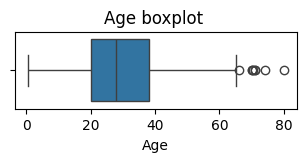

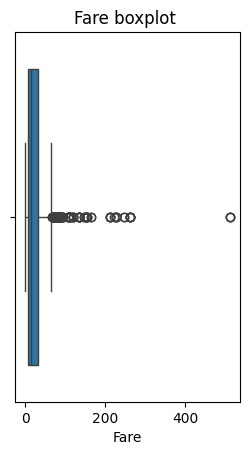

In [21]:
num_cols = df.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i , col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    sns.boxplot(df[col], orient='h')
    plt.title(f"{col} boxplot ")
    plt.show()

In [22]:
for col in num_cols :
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - 1.5*IQR
    Upper_Fence = Q3 + 1.5*IQR
    Lower_Outliers = df[df[col] < Lower_Fence][col].values
    Upper_Outliers = df[df[col] > Upper_Fence][col].values
    
    df[col].replace (Lower_Outliers, Lower_Fence, inplace=True)
    df[col].replace (Upper_Outliers, Upper_Fence, inplace=True)
    plt.show()

C:\Users\arbs\AppData\Local\Temp\ipykernel_22516\720104494.py:10: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df[col].replace (Lower_Outliers, Lower_Fence, inplace=True)
C:\Users\arbs\AppData\Local\Temp\ipykernel_22516\720104494.py:11: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained a

In [23]:
df.duplicate().sum()

AttributeError: 'DataFrame' object has no attribute 'duplicate'

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)